In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
!pip install shap  
import shap  

   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/544.4 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 163.8/544.4 kB 1.9 MB/s eta 0:00:01
   --------------------------------- ------ 450.6/544.4 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 3.1 MB/s eta 0:00:00


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import shap
import joblib

In [ ]:
"D:\Projects\Loan_default.csv"

In [3]:
df=pd.read_csv(r"D:\Projects\Loan_default.csv");df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [4]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [4]:
df.drop(columns=['LoanID'], inplace=True, errors='ignore')

In [6]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [7]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


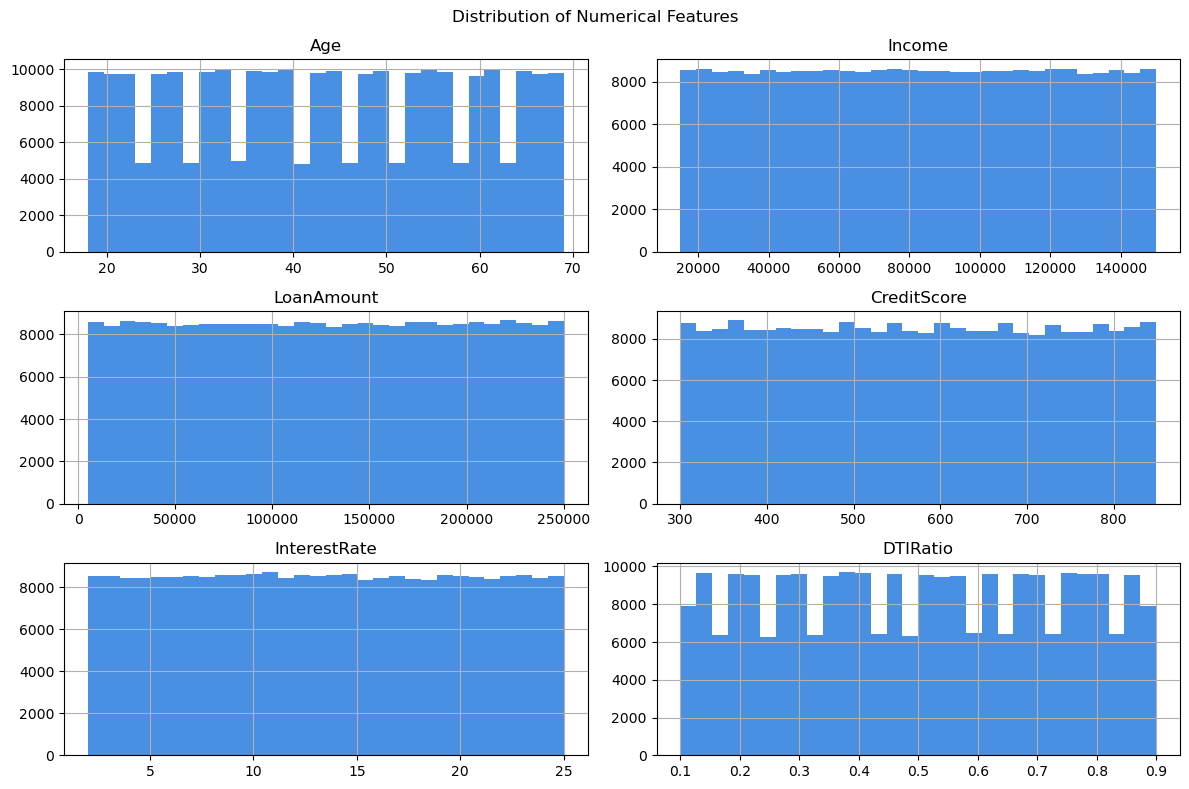

In [8]:
# Histograms of key numerical features
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'DTIRatio']

df[num_cols].hist(bins=30, figsize=(12, 8), color='#4a90e2')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()


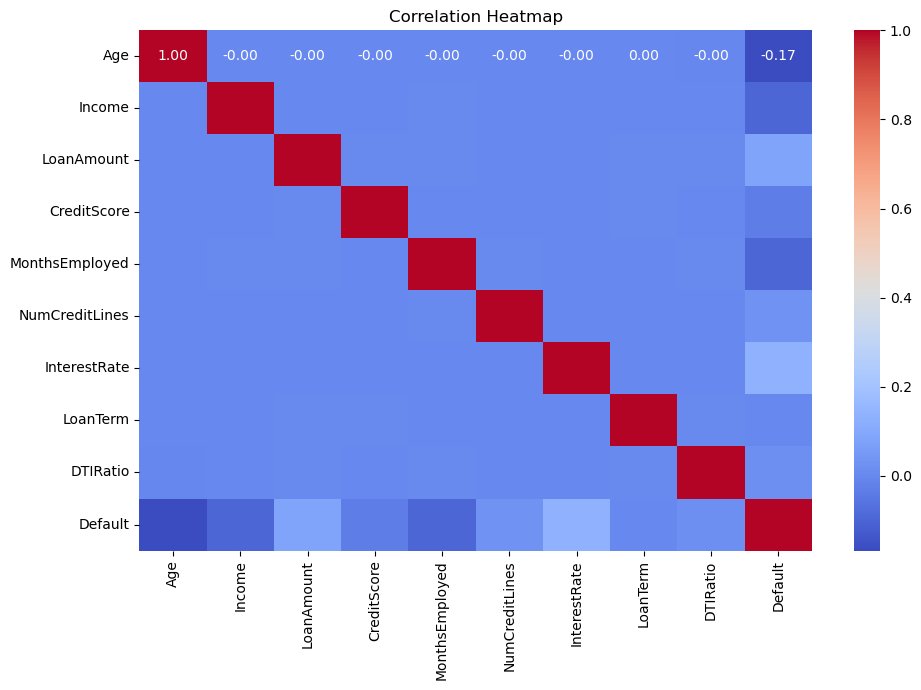

In [9]:
# Correlation matrix (for numerical features)
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


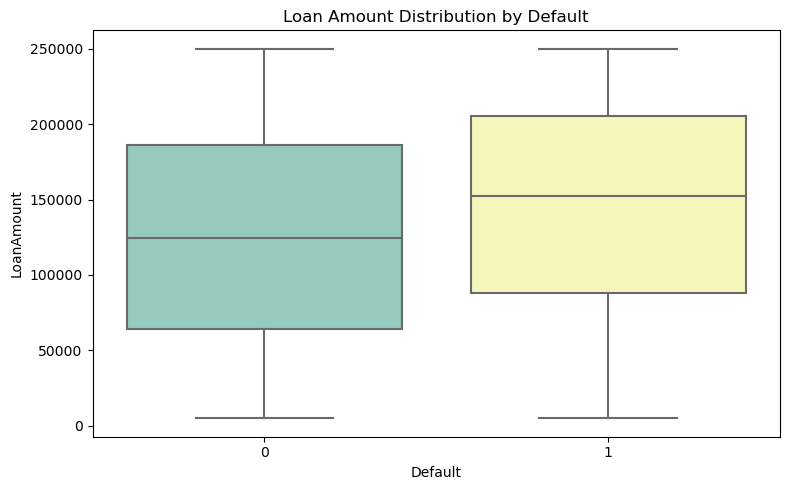

In [10]:
# Boxplot of Loan Amount by Default status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Default', y='LoanAmount', data=df, palette='Set3')
plt.title('Loan Amount Distribution by Default')
plt.tight_layout()
plt.show()


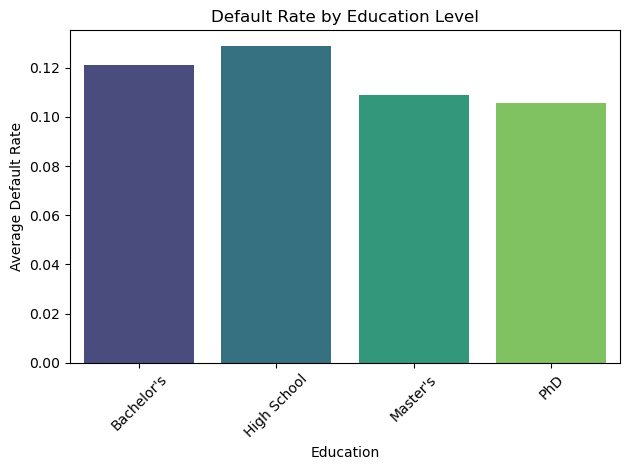

In [11]:
# Default rate by Education Level
edu_default = df.groupby('Education')['Default'].mean().reset_index()

sns.barplot(x='Education', y='Default', data=edu_default, palette='viridis')
plt.title('Default Rate by Education Level')
plt.xticks(rotation=45)
plt.ylabel('Average Default Rate')
plt.tight_layout()
plt.show()


In [12]:
# Encoding

In [5]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

In [9]:
binary_cols

['HasMortgage', 'HasDependents', 'HasCoSigner']

In [6]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,0,0,Other,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,0,0,Home,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,1,1,Auto,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,1,1,Other,0,0


In [22]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LoanPurpc
0,56,85994,50587,520,80,4,15.23,36,0.44,2,Full-time,Divorced,1,1,Other,1,0,5
1,69,50432,124440,458,15,1,4.81,60,0.68,3,Full-time,Married,0,0,Other,1,0,5
2,46,84208,129188,451,26,3,21.17,24,0.31,3,Unemployed,Divorced,1,1,Auto,0,1,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,Full-time,Married,0,0,Business,0,0,2
4,60,20437,9139,633,8,4,6.51,48,0.73,2,Unemployed,Divorced,0,1,Auto,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,Full-time,Married,0,0,Other,0,0,5
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,Part-time,Divorced,0,0,Home,0,1,4
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,Self-employed,Married,1,1,Auto,1,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,Part-time,Single,1,1,Other,0,0,5


In [7]:
# Define custom order for Education levels
education_mapping = {
    'High School': 1,
    "Bachelor's": 2,
    "Master's": 3,
    'PhD': 4
}

# Apply the mapping
df['Education'] = df['Education'].map(education_mapping)

# Verify encoding
print(df['Education'].value_counts())

Education
2    64366
1    63903
3    63541
4    63537
Name: count, dtype: int64


In [8]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,Unemployed,Divorced,0,1,Auto,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,Full-time,Married,0,0,Other,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,Part-time,Divorced,0,0,Home,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,Self-employed,Married,1,1,Auto,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,Part-time,Single,1,1,Other,0,0


In [17]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,Unemployed,Divorced,0,1,Auto,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,Full-time,Married,0,0,Other,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,Part-time,Divorced,0,0,Home,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,Self-employed,Married,1,1,Auto,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,Part-time,Single,1,1,Other,0,0


In [9]:
loan_purpose_mapping = {
    'Auto': 1,
    'Business': 2,
    'Education': 3,
    'Home': 4,
    'Other': 5
}

# Apply the mapping
df['LoanPurpose'] = df['LoanPurpose'].map(loan_purpose_mapping)

# Check result
print(df['LoanPurpose'].value_counts())

LoanPurpose
2    51298
4    51286
3    51005
5    50914
1    50844
Name: count, dtype: int64


In [10]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,Full-time,Divorced,1,1,5,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,Full-time,Married,0,0,5,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,Unemployed,Divorced,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,Full-time,Married,0,0,2,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,Unemployed,Divorced,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,Full-time,Married,0,0,5,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,Part-time,Divorced,0,0,4,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,Self-employed,Married,1,1,1,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,Part-time,Single,1,1,5,0,0


In [11]:
# Marital status encoding
marital_mapping = {
    'Single': 0,
    'Divorced': 1,
    'Married': 2
}


df['MaritalStatus'] = df['MaritalStatus'].map(marital_mapping)


In [12]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,Full-time,1,1,1,5,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,Full-time,2,0,0,5,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,Unemployed,1,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,Full-time,2,0,0,2,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,Unemployed,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,Full-time,2,0,0,5,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,Part-time,1,0,0,4,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,Self-employed,2,1,1,1,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,Part-time,0,1,1,5,0,0


In [16]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [13]:
print(df['EmploymentType'].unique())


['Full-time' 'Unemployed' 'Self-employed' 'Part-time']


In [14]:
df['EmploymentType'] = df['EmploymentType'].str.strip().str.lower()


In [17]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,full-time,1,1,1,5,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,full-time,2,0,0,5,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,unemployed,1,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,full-time,2,0,0,2,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,unemployed,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,full-time,2,0,0,5,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,part-time,1,0,0,4,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,self-employed,2,1,1,1,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,part-time,0,1,1,5,0,0


In [15]:
employment_mapping = {
    'unemployed': 0,
    'part-time': 1,
    'self-employed': 2,
    'full-time': 3
}

df['EmploymentType'] = df['EmploymentType'].map(employment_mapping)


In [16]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,3,1,1,1,5,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,3,2,0,0,5,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,0,1,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,3,2,0,0,2,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,3,2,0,0,5,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,1,0,0,4,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,2,1,1,1,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,0,1,1,5,0,0


In [20]:
print(df['EmploymentType'].isna().sum())


0


In [17]:
# Group and calculate average default rate
grouped = df.groupby(['Education', 'EmploymentType'])['Default'].mean().reset_index()

In [18]:
grouped

,Education,EmploymentType,Default
0,1,0,0.150532
1,1,1,0.131835
2,1,2,0.130136
3,1,3,0.102670
4,2,0,0.136725
5,2,1,0.125344
6,2,2,0.119481
7,2,3,0.102202
8,3,0,0.129382
9,3,1,0.114136


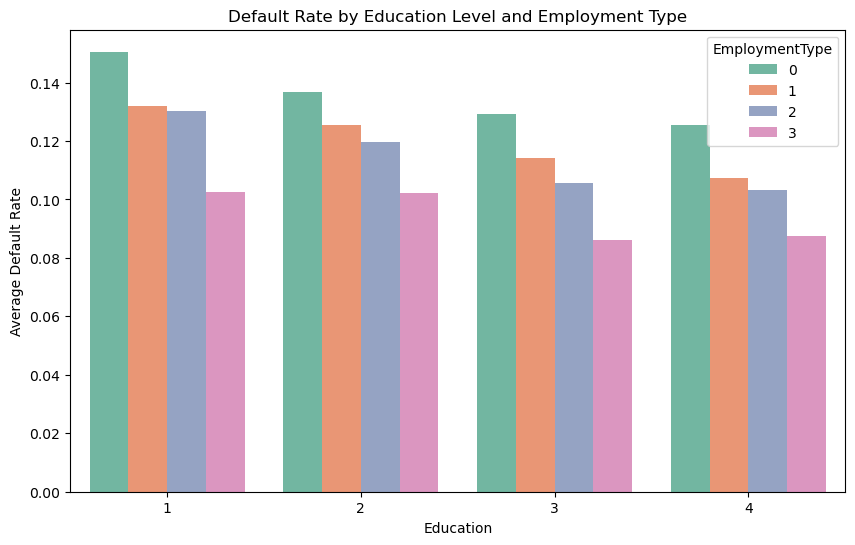

In [19]:
# Convert numeric hue variable to string
grouped['EmploymentType'] = grouped['EmploymentType'].astype(str)

# Now plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped, 
    x='Education', 
    y='Default', 
    hue='EmploymentType',  
    palette='Set2'
)
plt.title('Default Rate by Education Level and Employment Type')
plt.ylabel('Average Default Rate')
plt.show()

In [30]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,3,1,1,1,5,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,3,2,0,0,5,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,0,1,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,3,2,0,0,2,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,3,2,0,0,5,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,1,0,0,4,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,2,1,1,1,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,0,1,1,5,0,0


In [24]:
# Use stratified sampling to preserve class distribution
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target,
    test_size=0.2, 
    stratify=target,  # Critical for imbalance
    random_state=42
)

NameError: name 'features' is not defined

In [31]:
# Train

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Default'])   # Features
y = df['Default']                  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [33]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,3,1,1,1,5,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,3,2,0,0,5,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,0,1,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,3,2,0,0,2,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,3,2,0,0,5,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,1,0,0,4,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,2,1,1,1,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,0,1,1,5,0,0


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
from xgboost import XGBClassifier

model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,         # Number of trees
    learning_rate=0.1,        # Step size shrinkage
    max_depth=6,              # Maximum tree depth
    random_state=42,
    n_jobs=-1                 # Use all CPU cores
)

model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.62      0.07      0.13      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.53     51070
weighted avg       0.86      0.89      0.85     51070

Confusion Matrix:
 [[44877   262]
 [ 5505   426]]
ROC AUC Score: 0.7561464790922201


In [30]:
model = XGBClassifier(
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]), 
    n_estimators=100, 
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     45139
           1       0.23      0.67      0.34      5931

    accuracy                           0.70     51070
   macro avg       0.59      0.69      0.58     51070
weighted avg       0.86      0.70      0.75     51070

Confusion Matrix:
 [[31842 13297]
 [ 1948  3983]]
ROC AUC Score: 0.7557312365051575


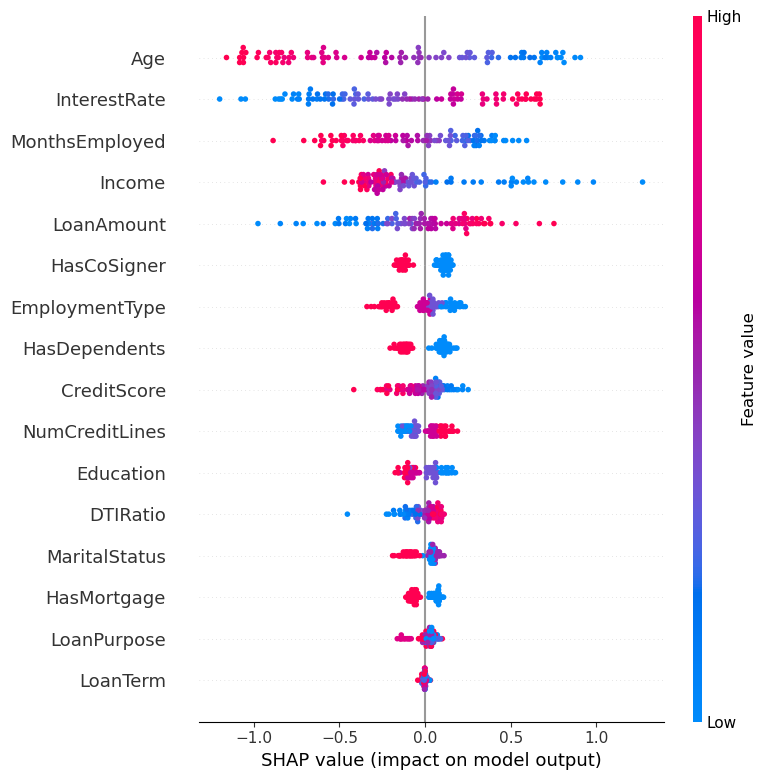

In [32]:
import shap

# Use TreeExplainer (specific for tree-based models like XGBoost)
explainer = shap.TreeExplainer(model)

# Compute SHAP values on a sample
shap_values = explainer.shap_values(X_test_scaled[:100])

# Visualize summary plot
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns)


In [33]:
import joblib

# Save model and scaler
joblib.dump(model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [34]:
joblib.dump(model, "xgb_model.pkl")

['xgb_model.pkl']

In [36]:
print(X.columns.tolist())
print(X.shape[1])  # number of features


['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
16


In [37]:
import numpy as np

# Example dummy values (replace with real values)
new_data = np.array([[35, 45000, 120000, 720, 14, 0.28, 1, 1, 0, 3, 2, 3, 3, 0, 1, 2]])

# Scale
new_data_scaled = scaler.transform(new_data)

# Predict
pred = model.predict(new_data_scaled)
prob = model.predict_proba(new_data_scaled)[0][1]

print("Predicted Default Class:", pred[0])
print("Probability of Default:", prob)


Predicted Default Class: 0
Probability of Default: 0.24843648


C:\Users\Jibran\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,3,1,1,1,5,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,3,3,2,0,0,5,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,3,0,1,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,3,2,0,0,2,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,3,2,0,0,5,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,1,0,0,4,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,2,2,1,1,1,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,1,0,1,1,5,0,0


In [5]:
scaler = joblib.load("scaler.pkl")
print(scaler.feature_names_in_)


['Age' 'Income' 'LoanAmount' 'CreditScore' 'MonthsEmployed'
 'NumCreditLines' 'InterestRate' 'LoanTerm' 'DTIRatio' 'Education'
 'EmploymentType' 'MaritalStatus' 'HasMortgage' 'HasDependents'
 'LoanPurpose' 'HasCoSigner']


In [7]:
import pandas as pd
import numpy as np
import joblib

# 1. Load Input CSV File

input_file = r"D:\Projects\Loan_default.csv"  # Update with your actual path
df = pd.read_csv(input_file)


# 2. Rename Columns to Match Training Features

df.rename(columns={
    'Employme': 'EmploymentType',
    'MaritalSta': 'MaritalStatus',
    'HasMortg': 'HasMortgage',
    'HasDepen': 'HasDependents',
    'LoanPurpc': 'LoanPurpose',
    'Feature14': 'MonthsEmployed',
    'Feature15': 'NumCreditLines',
    'Feature16': 'InterestRate'
}, inplace=True)


# 3. Apply Categorical Mappings

education_map = {'High School': 1, "Bachelor's": 2, "Master's": 3, 'PhD': 4}
loan_purpose_map = {'Auto': 1, 'Business': 2, 'Education': 3, 'Home': 4, 'Other': 5}
employment_map = {'Unemployed': 0, 'Part-time': 1, 'Self-employed': 2, 'Full-time': 3}
marital_map = {'Single': 0, 'Divorced': 1, 'Married': 2}

if 'Education' in df.columns:
    df['Education'] = df['Education'].map(education_map)

if 'LoanPurpose' in df.columns:
    df['LoanPurpose'] = df['LoanPurpose'].map(loan_purpose_map)

if 'EmploymentType' in df.columns:
    df['EmploymentType'] = df['EmploymentType'].astype(str).str.strip().str.title().map(employment_map)

if 'MaritalStatus' in df.columns:
    df['MaritalStatus'] = df['MaritalStatus'].map(marital_map)

# 4. Ensure All Expected Features Exist and Fix Binary Columns

expected_columns = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
    'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
    'LoanPurpose', 'HasCoSigner'
]

# Add any missing expected columns with default value 0
for col in expected_columns:
    if col not in df.columns:
        df[col] = 0

# Convert binary categorical fields like 'Yes'/'No' or True/False to 1/0
binary_mappings = {'Yes': 1, 'No': 0, True: 1, False: 0}
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].map(binary_mappings).fillna(df[col])

# Reorder columns to match model input
df = df[expected_columns]

# 5. Load Model and Scaler

scaler = joblib.load("scaler.pkl")
model = joblib.load("xgb_model.pkl")


# 6. Scale and Predict

X_scaled = scaler.transform(df)
preds = model.predict(X_scaled)
probs = model.predict_proba(X_scaled)[:, 1]


# 7. Save Results

df['Predicted_Default'] = preds
df['Default_Probability'] = probs

df.to_csv("predicted_output.csv", index=False)
print("✅ Predictions saved to 'predicted_output.csv'")


✅ Predictions saved to 'predicted_output.csv'


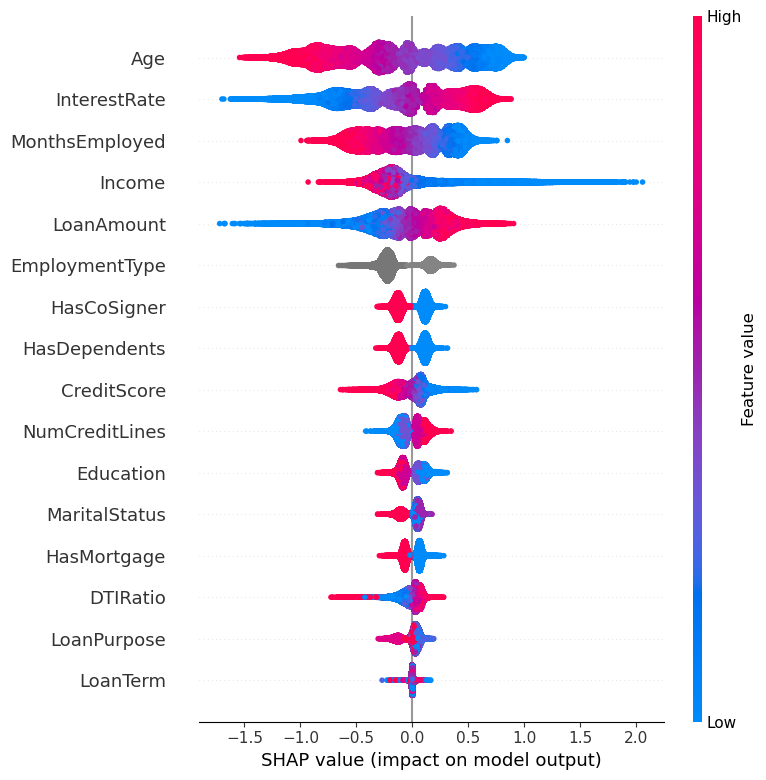

In [8]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_scaled)

# Summary plot (global importance)
shap.summary_plot(shap_values, df[expected_columns])

# Force plot (single prediction)
shap.plots.force(shap_values[0])
